In [0]:
!unzip train.zip
!unzip test.zip
!unzip validation.zip

In [0]:
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras import models
from keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import optimizers
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np



'''
データの設定
'''
batch_size =20

conv_base = VGG16(
    weights = "imagenet",           # モデルを初期化するための重みのチェックポイントを指定
    include_top = False,            # ネットワークの出力側にある全結合分類器を含めるかどうか
    input_shape = (150, 150, 3)     # ネットワークに供給する画像テンソルの形状 (引数を指定しない場合,ネットワークは任意のサイズの入力を処理できる)
)
# conv_base.summary()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "train",
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    "validation",
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

'''
モデルの構築
'''

model = models.Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
# model.summary()
conv_base.trainable = False
model.compile(
    optimizer= optimizers.RMSprop(lr=2e-5),
    loss= "binary_crossentropy",
    metrics= ["acc"]
)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
58892288/58889256 [==============================] - 3s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
'''
学習
'''
early_stopping = EarlyStopping(monitor= "val_loss", patience= 10, verbose= 1)
# batch_size = 32

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
    callbacks= [early_stopping]
)

model.save("cats_and_dogs_small_4.h5")

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
100/100 [==============================] - 33s 332ms/step - loss: 0.7229 - acc: 0.6255 - val_loss: 0.5766 - val_acc: 0.7110
Epoch 2/30
100/100 [==============================] - 28s 278ms/step - loss: 0.6187 - acc: 0.6870 - val_loss: 0.4411 - val_acc: 0.8000
Epoch 3/30
100/100 [==============================] - 27s 270ms/step - loss: 0.5231 - acc: 0.7360 - val_loss: 0.3665 - val_acc: 0.8410
Epoch 4/30
100/100 [==============================] - 27s 268ms/step - loss: 0.4979 - acc: 0.7610 - val_loss: 0.3204 - val_acc: 0.8580
Epoch 5/30
100/100 [==============================] - 26s 257ms/step - loss: 0.4539 - acc: 0.7895 - val_loss: 0.2971 - val_acc: 0.8680
Epoch 6/30
100/100 [==============================] - 26s 262ms/step - loss: 0.4749 - acc: 0.7870 - val_loss: 0.2983 - val_acc: 0.8740
Epoch 7/30
100/100 [==============================] - 26s 262ms/step - loss: 0.4342 - acc: 0.8065 - val_loss: 0.2794 - val_acc: 0.8820
Epoch 8

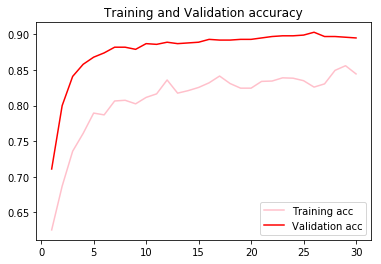

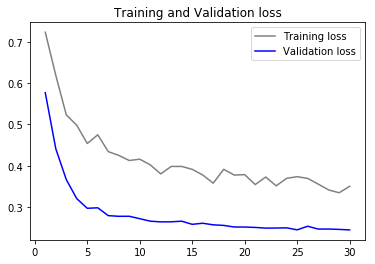

In [0]:
'''
評価
'''
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label="Training acc", color= "pink")
plt.plot(epochs, val_acc, label="Validation acc", color= "red")
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, label="Training loss", color= "gray")
plt.plot(epochs, val_loss, label="Validation loss", color= "blue")
plt.title("Training and Validation loss")
plt.legend()

plt.show()

In [0]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block1_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      callbacks = [early_stopping]
)

model.save('cats_and_dogs_small_4.h5')


Epoch 1/30
100/100 [==============================] - 47s 474ms/step - loss: 0.3070 - acc: 0.8715 - val_loss: 0.2180 - val_acc: 0.9190
Epoch 2/30
100/100 [==============================] - 44s 436ms/step - loss: 0.2779 - acc: 0.8875 - val_loss: 0.1495 - val_acc: 0.9450
Epoch 3/30
100/100 [==============================] - 44s 437ms/step - loss: 0.2256 - acc: 0.9035 - val_loss: 0.1292 - val_acc: 0.9430
Epoch 4/30
100/100 [==============================] - 44s 436ms/step - loss: 0.2077 - acc: 0.9130 - val_loss: 0.1170 - val_acc: 0.9610
Epoch 5/30
100/100 [==============================] - 44s 436ms/step - loss: 0.1873 - acc: 0.9210 - val_loss: 0.0982 - val_acc: 0.9630
Epoch 6/30
100/100 [==============================] - 44s 436ms/step - loss: 0.1552 - acc: 0.9340 - val_loss: 0.1260 - val_acc: 0.9520
Epoch 7/30
100/100 [==============================] - 44s 437ms/step - loss: 0.1405 - acc: 0.9495 - val_loss: 0.1123 - val_acc: 0.9620
Epoch 8/30
100/100 [==============================] - 4

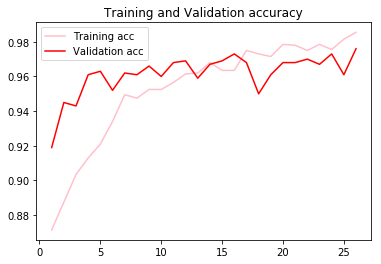

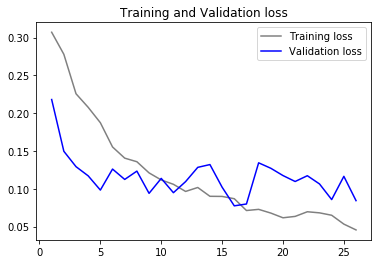

In [0]:
'''
評価
'''
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, label="Training acc", color= "pink")
plt.plot(epochs, val_acc, label="Validation acc", color= "red")
plt.title("Training and Validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, label="Training loss", color= "gray")
plt.plot(epochs, val_loss, label="Validation loss", color= "blue")
plt.title("Training and Validation loss")
plt.legend()

plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
    "test",
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "binary"
)
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)

Found 1000 images belonging to 2 classes.


In [0]:
print("test acc:", test_acc)

test acc: 0.9699999940395355


In [0]:
from keras.models import load_model
model = load_model("cats_and_dogs_small_4.h5")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total para

In [0]:
img_path = "test/dogs/dog.1550.jpg"
# この画像を四次元テンソルとして前処理
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
# 形状(1, 150, 150, 3), 正規化
# img_tensor

In [0]:
# 0 -> 猫, 1 -> 犬
preds = model.predict(img_tensor)
print(preds)

[[0.99963737]]


In [0]:
np.argmax(preds[0])

0

In [0]:
layer_output = layer_dict[layer_name].output
loss = K.mean(layer_output[:, :, :, filter_index])

# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

In [0]:
from keras import backend as K
predict_output = model.output[:,0]
vgg16_remodel = model.get_layer('vgg16')
# 修正したvgg16の最後の畳み込み層の出力特徴マップ
last_conv_layer = vgg16_remodel.get_layer("block5_conv3")
# block5_conv3の出力特徴マップでの勾配
grads = K.gradients(predict_output, last_conv_layer.output)[0]

# 形状が(512, )のベクトル
print(model.output)
print(predict_output)
print(vgg16_remodel)
print(last_conv_layer)
print(K.gradients(predict_output, last_conv_layer.output))
print(grads)
# pooled_grads = K.mean(grads, axis=(0, 1, 2))

Tensor("dense_2_3/Sigmoid:0", shape=(?, 1), dtype=float32)
Tensor("strided_slice_41:0", shape=(?,), dtype=float32)
[None]
None


AttributeError: ignored

https://stackoverflow.com/questions/49834380/k-gradientsloss-input-img0-return-none-keras-cnn-visualization-with-ten

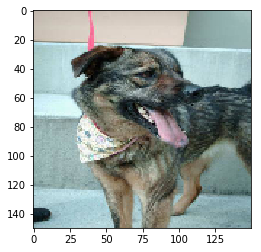

In [0]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()